In [4]:
# make necessary imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data
from torch.optim import *
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from AE import AEwrapper

# Trying out different techniques on noisy Swiss roll dataset

In [8]:
from sklearn.datasets import make_swiss_roll
import pandas as pd
import numpy as np

def make_NoisySwissRoll(n_samples, n_noise):
    data, colors = make_swiss_roll(n_samples = n_samples)
    data_df = pd.DataFrame(columns = [str(i) for i in range(3)], data=data)
    for j in range(n_noise):
        data_df[str(j+3)] = pd.Series(np.random.rand(n_samples))
    return data_df.to_numpy(), data_df[["0","1","2"]].to_numpy(), colors   
        

In [9]:
data, data_no_noise, colors = make_NoisySwissRoll(10000, 12)

In [10]:
data.shape

(10000, 15)

In [11]:
from sklearn.manifold import SpectralEmbedding

embedding = SpectralEmbedding(n_components=3)
data_reduced = embedding.fit_transform(data)

In [13]:
import plotly.graph_objects as go

xdata = data_reduced[:,0]
ydata = data_reduced[:,1]
zdata = data_reduced[:,2]

fig = go.Figure(data=[go.Scatter3d(x=xdata, 
                                   y=ydata,
                                   z=zdata,
                                   mode='markers',
                                   marker = dict(
                                            size=12,
                                            color=colors,
                                            colorscale='Viridis',
                                            opacity=0.8))])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [17]:
OUTPUT_dim = 3
INPUT_dim = 15
EPOCH_NUM = 20
OBSERVATIONS = 10**4

swiss_roll_dat = torch.Tensor(data)

# Split into training and testing sets 80-20
train_set, val_set = torch.utils.data.random_split(swiss_roll_dat,
                                                   [int(OBSERVATIONS*0.8), int(OBSERVATIONS*0.2)])

# prepare data loaders
trainloader = torch.utils.data.DataLoader(train_set, batch_size = BATCH_SIZE, shuffle=True)
testloader  = torch.utils.data.DataLoader(val_set, batch_size = BATCH_SIZE, shuffle=False)

ae = AEwrapper(INPUT_dim, OUTPUT_dim, trainloader, testloader)

for epoch in range(1, EPOCH_NUM + 1):
    ae.train_AE(epoch)
    ae.test_AE(epoch)

====> Epoch: 1 Average loss: 0.1426
====> Test set loss: 0.1393
====> Epoch: 2 Average loss: 0.1408
====> Test set loss: 0.1393
====> Epoch: 3 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 4 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 5 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 6 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 7 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 8 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 9 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 10 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 11 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 12 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 13 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 14 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 15 Average loss: 0.1407
====> Test set loss: 0.1393
====> Epoch: 16 Average loss: 0.14

In [18]:
data_reduced_ae = ae.model.encode(swiss_roll_dat).detach().numpy()

In [20]:
import plotly.graph_objects as go

xdata = data_reduced_ae[:,0]
ydata = data_reduced_ae[:,1]
zdata = data_reduced_ae[:,2]

fig = go.Figure(data=[go.Scatter3d(x=xdata, 
                                   y=ydata,
                                   z=zdata,
                                   mode='markers',
                                   marker = dict(
                                            size=12,
                                            color=colors,
                                            colorscale='Viridis',
                                            opacity=0.8))])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

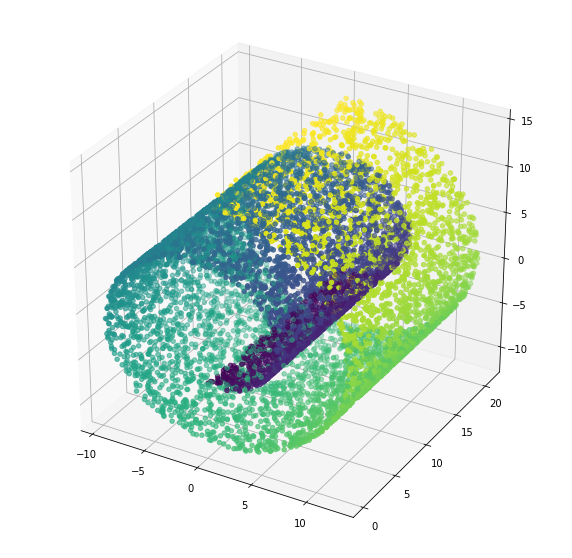

In [45]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

xdata = data_no_noise[:,0]
ydata = data_no_noise[:,1]
zdata = data_no_noise[:,2]

ax.scatter3D(xdata, ydata, zdata, c=colors);

# Trying out on simple dataset - swiss roll.

In [156]:
##################################################
##################################################
######### Preparing data for PyTorch #############
##################################################
##################################################

DATADIR = "../../word2vecSamples"
FILE = "word2vec_4.csv"
OBSERVATIONS = 10**5
PATH_TO_DATA = Path(DATADIR)/FILE
BATCH_SIZE = 100

# # read the data in, convert it into PyTorch tensor
# word2vec_dat = pd.read_csv(PATH_TO_DATA)[[str(i) for i in range(1,301)]]
# word2vec_dat = torch.Tensor(word2vec_dat.to_numpy())

# # Split into training and testing sets 80-20
# train_set, val_set = torch.utils.data.random_split(word2vec_dat,
#                                                    [int(OBSERVATIONS*0.8), int(OBSERVATIONS*0.2)])

from sklearn.datasets import make_swiss_roll

data_or, colors = make_swiss_roll(n_samples = OBSERVATIONS)
data = torch.Tensor(data_or)
train_set, val_set = torch.utils.data.random_split(data,
                                                   [int(OBSERVATIONS*0.8), int(OBSERVATIONS*0.2)])

# prepare data loaders
trainloader = torch.utils.data.DataLoader(train_set, batch_size = BATCH_SIZE, shuffle=True)
testloader  = torch.utils.data.DataLoader(val_set, batch_size = BATCH_SIZE, shuffle=False)

In [157]:
##################################################
##################################################
#########        Training VAE        #############
##################################################
##################################################

OUTPUT_dim = 2
INPUT_dim = 3
EPOCH_NUM = 20

ae = AEwrapper(INPUT_dim, OUTPUT_dim, trainloader, testloader)

for epoch in range(1, EPOCH_NUM + 1):
    ae.train_AE(epoch)
    ae.test_AE(epoch)

====> Epoch: 1 Average loss: 0.0683
====> Test set loss: 0.0680
====> Epoch: 2 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 3 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 4 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 5 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 6 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 7 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 8 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 9 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 10 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 11 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 12 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 13 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 14 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 15 Average loss: 0.0682
====> Test set loss: 0.0679
====> Epoch: 16 Average loss: 0.06

In [158]:
test_enc = ae.model.encode(torch.Tensor(data_or))

In [159]:
test_enc.data.numpy()[:,0]

array([ 4.833587 , -1.7375346, -4.6272182, ..., -1.7961566,  6.5758967,
        2.6133845], dtype=float32)

In [160]:
colors

array([14.01707375, 11.09212716,  9.37311413, ...,  8.48207355,
        6.80506338,  5.99865827])

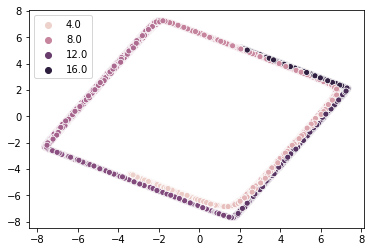

In [161]:
import seaborn as sns
sns.scatterplot(test_enc.data.numpy()[:,0], test_enc.data.numpy()[:, 1], hue=colors)

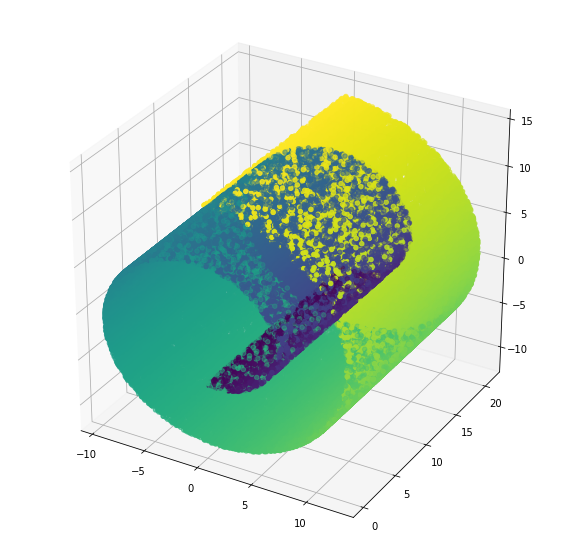

In [162]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

dat = torch.Tensor(data_or)

xdata = dat[:,0]
ydata = dat[:,1]
zdata = dat[:,2]

ax.scatter3D(xdata, ydata, zdata, c=colors);

# Trying on word2vec

In [5]:
##################################################
##################################################
######### Preparing data for PyTorch #############
##################################################
##################################################

DATADIR = "samples_word2vec"
FILE = "small_w2v.csv"
OBSERVATIONS = 10**4
PATH_TO_DATA = Path(DATADIR)/FILE
BATCH_SIZE = 100

# read the data in, convert it into PyTorch tensor
word2vec_dat_or = pd.read_csv(PATH_TO_DATA)[[str(i) for i in range(1,301)]]
word2vec_dat = torch.Tensor(word2vec_dat_or.to_numpy())

# Split into training and testing sets 80-20
train_set, val_set = torch.utils.data.random_split(word2vec_dat,
                                                   [int(OBSERVATIONS*0.8), int(OBSERVATIONS*0.2)])

# prepare data loaders
trainloader = torch.utils.data.DataLoader(train_set, batch_size = BATCH_SIZE, shuffle=True)
testloader  = torch.utils.data.DataLoader(val_set, batch_size = BATCH_SIZE, shuffle=False)

In [7]:
##################################################
##################################################
#########        Training VAE        #############
##################################################
##################################################

OUTPUT_dim = 2
INPUT_dim = 300
EPOCH_NUM = 10

ae = AEwrapper(INPUT_dim, OUTPUT_dim, trainloader, testloader)

for epoch in range(1, EPOCH_NUM + 1):
    ae.train_AE(epoch)
    ae.test_AE(epoch)

====> Epoch: 1 Average loss: 0.0007
====> Test set loss: 0.0003
====> Epoch: 2 Average loss: 0.0003
====> Test set loss: 0.0003
====> Epoch: 3 Average loss: 0.0003
====> Test set loss: 0.0003
====> Epoch: 4 Average loss: 0.0003
====> Test set loss: 0.0003
====> Epoch: 5 Average loss: 0.0003
====> Test set loss: 0.0003
====> Epoch: 6 Average loss: 0.0003
====> Test set loss: 0.0003
====> Epoch: 7 Average loss: 0.0003
====> Test set loss: 0.0003
====> Epoch: 8 Average loss: 0.0003
====> Test set loss: 0.0003
====> Epoch: 9 Average loss: 0.0003
====> Test set loss: 0.0003
====> Epoch: 10 Average loss: 0.0003
====> Test set loss: 0.0003
